## This session in used to show how to use geopandas for spatial data processing

The pandas library has made data manipulation and analysis far easier in Python. But what happens when you need to analyse and manipulate geospatial data? This tutorial will walk you through the use of GeoPandas to manipulate spatial data and do spatial analsis.

The geopandas wraps serveral other open source modules, pandas, fiona, and shapely. It makes  spatial data manipulations much easier, although it has its own capability and it is not as flexible as the fiona and shapely. It is good to start with geopandas if you are not quite familar with using open source tools for spatial analysis. Before this session, you need to have GeoPandas installed on your computer. Here, I suggest to use anaconda to configure the environment and install Python modules (http://geopandas.org/install.html#installing-geopandas). 

In this session, you will learn:
1.  Using GeoPandas to read shapefiles
1.  Projection manipulation
1.  Spatial join of different shapefiles
1.  Create maps using GeoPandas


In [1]:
# !pip install descartes
# !pip install mapclassify

In [3]:
!pip install geopandas

59.04s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 4.4 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 24.3 MB/s eta 0:00:00a 0:00:01


In [7]:
import geopandas as gpd
import time
from matplotlib import pyplot as plt
import os

In [8]:
os.chdir("/Users/songj/Documents/GitHub/ai-urban-sustainability/lab2-vector-data-manipulation")

Read the shapefile of traffic accident data in Philadelphia

#### Read the traffic accident data

In [9]:
t0 = time.time()
# geopandas will read the shapefile into a data frame with the geometric information
accident = gpd.read_file("data/crash_data_collision_crash_2007_2017.shp")
print(time.time() - t0)

2.705217123031616


Get the coordinate reference system (CRS) information

In [10]:
accident.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Read the census tract shapefile

In [11]:
censusMap = gpd.read_file("data/census-tract-data.shp")

censusMap.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

Draw the census tract map

<Axes: >

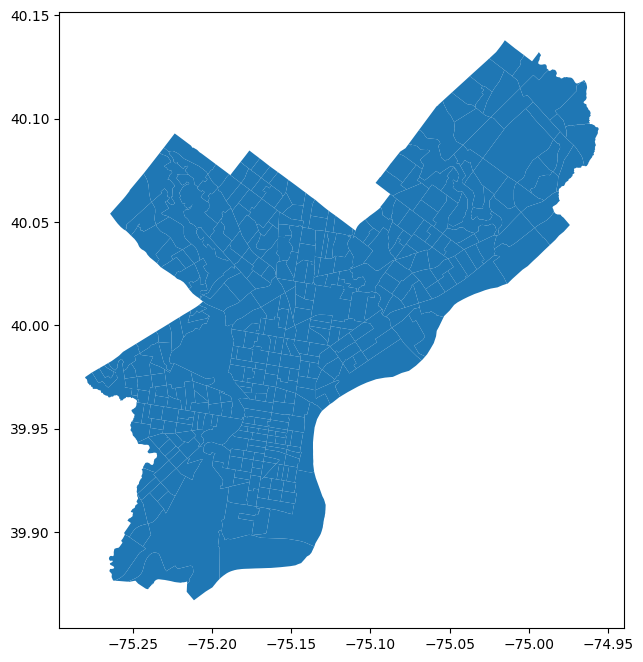

In [12]:
fig, ax = plt.subplots(1, figsize=(8, 8))

shpfile = 'data/census-tract-data.shp'
gpddf = gpd.read_file(shpfile)
gpddf.plot(ax=ax)

### Reproject shapefile into a new projection
In order to do spatial join of the traffic accident and the census tract data, we need to make sure different shapefiles are in the same projection.

In [26]:
accident_reprojected = accident.to_crs('EPSG:4269')

accident_reprojected.head()

,county_nam,objectid_1,objectid,crn,district,county,municipali,crash_year,crash_mont,day_of_wee,...,ped_count,ped_death_,ped_maj_in,max_severi,comm_veh_c,dec_lat,dec_long,rdwy_surf_,wz_law_off,geometry
0,None,9498,128198,2016019772,6,67,67301,2016,2,2,...,1,0,0,3,0,40.0628,-75.0577,None,None,POINT (-75.0577 40.0628)
1,None,9570,128432,2016013724,6,67,67301,2016,1,3,...,0,0,0,3,0,40.0822,-74.9669,None,None,POINT (-74.9669 40.0822)
2,None,9642,128688,2016038282,6,67,67301,2016,3,5,...,0,0,0,0,1,39.9751,-75.1946,None,None,POINT (-75.1946 39.9751)
3,None,9714,128842,2016052220,6,67,67301,2016,2,5,...,0,0,0,8,0,40.0357,-75.2171,None,None,POINT (-75.2171 40.0357)
4,None,9786,128975,2016087187,6,67,67301,2016,8,6,...,1,0,0,4,0,39.9511,-75.1721,None,None,POINT (-75.1721 39.9511)


### Filter out some records
Let just extract the traffic accident records in 2015

In [27]:
accident_2015 = accident_reprojected.loc[accident_reprojected['crash_year'] == 2015] #locate the traffic accident in 2015
accident_2015.head()


,county_nam,objectid_1,objectid,crn,district,county,municipali,crash_year,crash_mont,day_of_wee,...,ped_count,ped_death_,ped_maj_in,max_severi,comm_veh_c,dec_lat,dec_long,rdwy_surf_,wz_law_off,geometry
22660,None,22661,274853,2015028828,6,67,67301,2015,2,1,...,0,0,0,4,0,39.9765,-75.1894,None,None,POINT (-75.1894 39.9765)
22661,None,22662,274856,2015030569,6,67,67301,2015,2,4,...,0,0,0,4,0,40.0371,-75.1657,None,None,POINT (-75.1657 40.0371)
22662,None,22663,274862,2015038631,6,67,67301,2015,3,5,...,0,0,0,4,0,40.0275,-75.0800,None,None,POINT (-75.08 40.0275)
22663,None,22664,274891,2015025058,6,67,67301,2015,2,3,...,0,0,0,4,0,39.9238,-75.2397,None,None,POINT (-75.2397 39.9238)
22664,None,22665,274898,2015033754,6,67,67301,2015,2,7,...,0,0,0,8,0,40.0719,-75.0296,None,None,POINT (-75.0296 40.0719)


### Using multiple cretiria to do query
Select traffic accidents in first day of week and in year of 2015
`|` is or

`&` is and

In [28]:
accident_2015_firstday = accident_reprojected.loc[(accident_reprojected['day_of_wee'] == 1) & (accident_reprojected['crash_year'] == 2015)] #locate the traffic accident in 2015
accident_2015_firstday.head()

,county_nam,objectid_1,objectid,crn,district,county,municipali,crash_year,crash_mont,day_of_wee,...,ped_count,ped_death_,ped_maj_in,max_severi,comm_veh_c,dec_lat,dec_long,rdwy_surf_,wz_law_off,geometry
22660,None,22661,274853,2015028828,6,67,67301,2015,2,1,...,0,0,0,4,0,39.9765,-75.1894,None,None,POINT (-75.1894 39.9765)
22667,None,22668,274981,2015006060,6,67,67301,2015,1,1,...,0,0,0,0,0,39.9081,-75.1560,None,None,POINT (-75.156 39.9081)
22704,None,22705,267542,2015051989,6,67,67301,2015,4,1,...,0,0,0,4,0,39.9374,-75.2176,None,None,POINT (-75.2176 39.9374)
22709,None,22710,267605,2015021890,6,67,67301,2015,2,1,...,0,0,0,4,0,39.9069,-75.1938,None,None,POINT (-75.1938 39.9069)
22711,None,22712,267652,2015025067,6,67,67301,2015,2,1,...,0,0,0,4,0,40.0282,-75.1081,None,None,POINT (-75.1081 40.0282)


### Plot the traffic accident map

<Axes: >

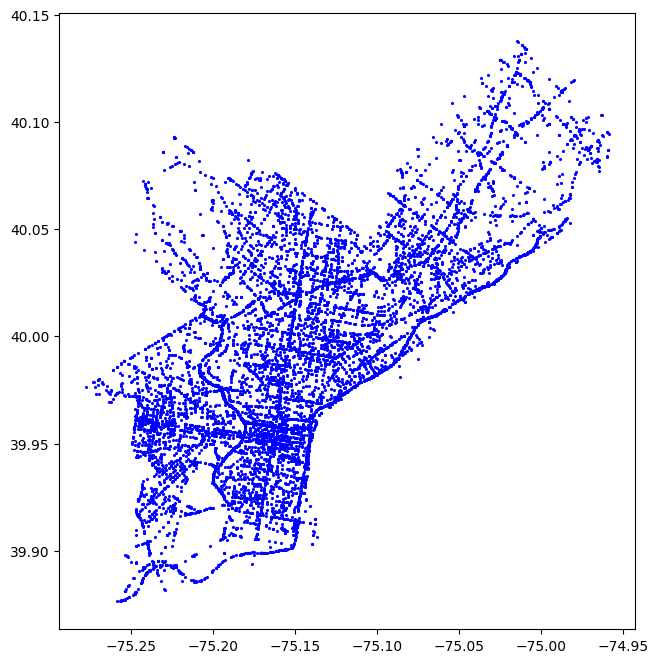

<Figure size 1000x1000 with 0 Axes>

In [16]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1, figsize=(8, 8))

plt.figure(figsize=(10, 10))
accident_2015.plot(marker='*', 
                   ax=ax, 
                   color='blue', 
                   markersize=2)

### Map the point map with the basemap of the census tract
You can use `GeoPandas` to map multiple layer shapefile. If you get message of 'No module decartes', just type in `!pip install descartes` in a new cell.

<Axes: >

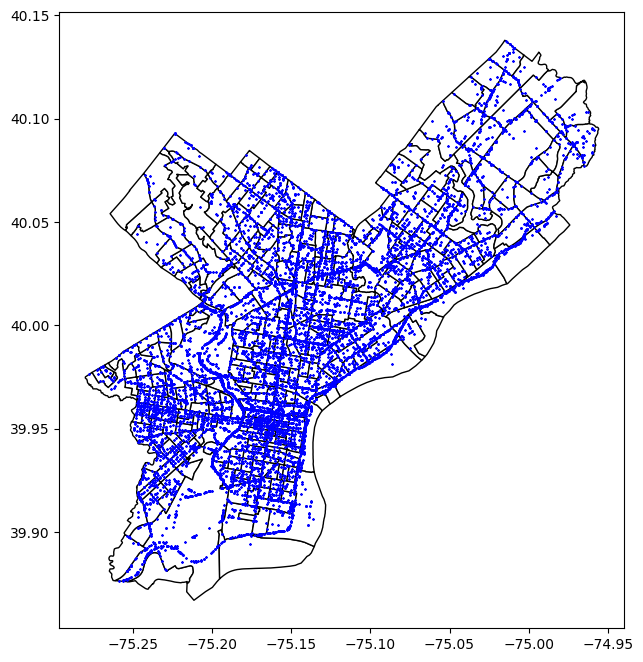

<Figure size 1000x1000 with 0 Axes>

In [17]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1, figsize=(8, 8))

plt.figure(figsize=(10, 10))

censusMap.plot(ax=ax, color='white', edgecolor='black')

accident_2015.plot(marker='*', 
                   ax=ax, 
                   color='blue', 
                   markersize=1)


### Spatial Join
The map doesn't give a clear spatial pattern of the the traffic accidents. We can first aggregate the point to census tract and create a choropleth map.

In [29]:
# because two shapefiles are in the same projection, we can do spatial intersect
joined = gpd.sjoin(accident_2015, censusMap, how='left', predicate='intersects')
print(joined.head())

      county_nam  objectid_1  objectid         crn  district  county_left  \
22660       None       22661    274853  2015028828         6           67   
22661       None       22662    274856  2015030569         6           67   
22662       None       22663    274862  2015038631         6           67   
22663       None       22664    274891  2015025058         6           67   
22664       None       22665    274898  2015033754         6           67   

       municipali  crash_year  crash_mont  day_of_wee  ...  male85_  \
22660       67301        2015           2           1  ...        0   
22661       67301        2015           2           4  ...       23   
22662       67301        2015           3           5  ...        0   
22663       67301        2015           2           3  ...        0   
22664       67301        2015           2           7  ...        6   

       fema_65_66  fema_67_69  fema70_74  fema75_79  fema80_84  fema85_ state  \
22660           3           0

### Group by tract
Count the number of traffic accidents in each census tract

In [30]:
results = joined.groupby('tract').size().to_frame('size')
print(results)


        size
tract       
000100    75
000200    44
000300    97
000401    27
000402    49
...      ...
980600    17
980700   137
980800    13
980900   395
989100    75

[383 rows x 1 columns]


### Merge the stand alone table with the shapefile

The spatial joined table is a table not a shapefile. In order to create a map, we need to assign coordinate information to the traffic accident data by census tract. We can use `Merge` to create a shapefile with the traffic accident informaiton. 

In [31]:
import pandas as pd

## Merge the accident data to the shapefile
trafficAccident = pd.merge(censusMap, results, on="tract")

# trafficAccident.head()

If you get a message of no module of `mapclassify`, just create a new cell below and type in `!pip install mapclassify`

In [23]:
!pip install mapclassify

279.45s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


  Using cached mapclassify-2.8.1-py3-none-any.whl.metadata (2.8 kB)
Using cached mapclassify-2.8.1-py3-none-any.whl (59 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 12.4 MB/s eta 0:00:00a 0:00:01


<Axes: >

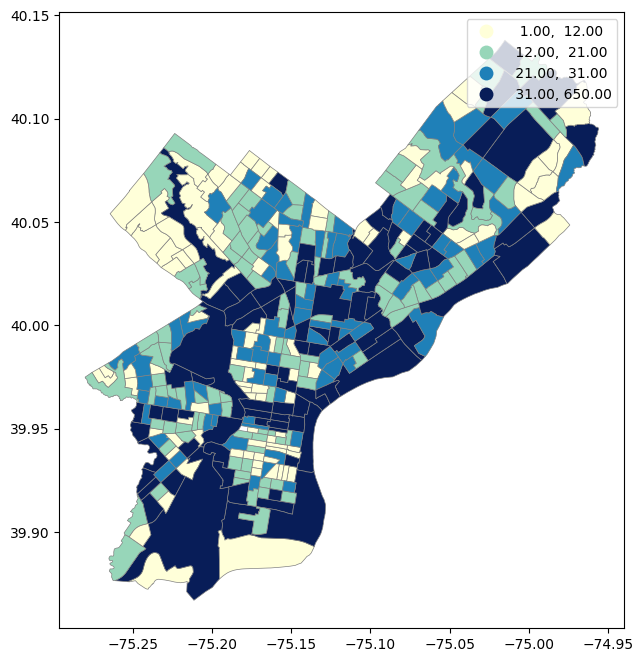

In [32]:
import mapclassify as mc

# create a empty plot for the choropleth map
fig, ax = plt.subplots(1, figsize=(8, 8))

trafficAccident.plot(column='size', 
                         cmap='YlGnBu', 
                         edgecolor='0.5',
                         ax = ax,
                         linewidth=0.5,
                         legend=True,
                         k=4, #the number of classes
                         scheme='quantiles') # 'equal_interval', 'quantiles', 'FisherJenks', 'NaturalBreaks'


Save the new geopandas dataframe to a shapefile

In [33]:
trafficAccident.to_file("trafficAccidentByCensusTract.shp")


### Reference:

1. GeoPandas tutorial: http://geopandas.org/index.html
2. AutoGIS Document: https://automating-gis-processes.github.io/2016/Lesson2-geopandas-basics.html
3. Python Foundation for Spatial Analysis, https://courses.spatialthoughts.com/python-foundation.html

### Homework
Plot the spatial distribution of the traffic accidents for any centain day, month year at the census tract level. Just show me you can use `and` and `or` to do multiple queries.

Hint:
Using `&` and `|` to create a multiple queries.

Then use the spatial join to get the number of accidents at the census tract level.


In [35]:
# select accidents from weekend days in January 2018
accident_2018_jan_wknd = accident_reprojected.loc[(accident_reprojected['day_of_wee'] == 6) | (accident_reprojected['day_of_wee'] == 7) & (accident_reprojected['crash_year'] == 2018) & (accident_reprojected['crash_mont'] == 1)]

# view filtered accident data
accident_2018_jan_wknd.head()

,county_nam,objectid_1,objectid,crn,district,county,municipali,crash_year,crash_mont,day_of_wee,...,ped_count,ped_death_,ped_maj_in,max_severi,comm_veh_c,dec_lat,dec_long,rdwy_surf_,wz_law_off,geometry
4,None,9786,128975,2016087187,6,67,67301,2016,8,6,...,1,0,0,4,0,39.9511,-75.1721,None,None,POINT (-75.1721 39.9511)
7,None,9019,129739,2016026138,6,67,67301,2016,2,6,...,0,0,0,2,0,40.0123,-75.1754,None,None,POINT (-75.1754 40.0123)
11,Philadelphia,4,909,2017058044,6,67,67301,2017,5,6,...,0,0,0,0,0,39.9034,-75.1504,None,None,POINT (-75.1504 39.9034)
13,Philadelphia,6,925,2017041234,6,67,67301,2017,3,6,...,1,0,0,4,0,39.9352,-75.1542,None,None,POINT (-75.1542 39.9352)
17,Philadelphia,10,1007,2017071744,6,67,67301,2017,2,6,...,0,0,0,3,0,39.9471,-75.2267,None,None,POINT (-75.2267 39.9471)


In [39]:
# spatial join filtered accidents to census tracts using "intersects" operation
joined_hw = gpd.sjoin(accident_2018_jan_wknd, censusMap, how='left', predicate='intersects')

# view result of spatial join
print(joined_hw.head())

      county_nam  objectid_1  objectid         crn  district  county_left  \
4           None        9786    128975  2016087187         6           67   
7           None        9019    129739  2016026138         6           67   
11  Philadelphia           4       909  2017058044         6           67   
13  Philadelphia           6       925  2017041234         6           67   
17  Philadelphia          10      1007  2017071744         6           67   

    municipali  crash_year  crash_mont  day_of_wee  ...  male85_  fema_65_66  \
4        67301        2016           8           6  ...        0          50   
7        67301        2016           2           6  ...        0          51   
11       67301        2017           5           6  ...        0           0   
13       67301        2017           3           6  ...       26          31   
17       67301        2017           2           6  ...       19          29   

    fema_67_69  fema70_74  fema75_79  fema80_84  fema85_

In [40]:
# extract crash counts by tract
results_hw = joined_hw.groupby('tract').size().to_frame('size')

# view crash counts
print(results_hw.head())

        size
tract       
000100    74
000200    49
000300   105
000401    35
000402    76


<Axes: >

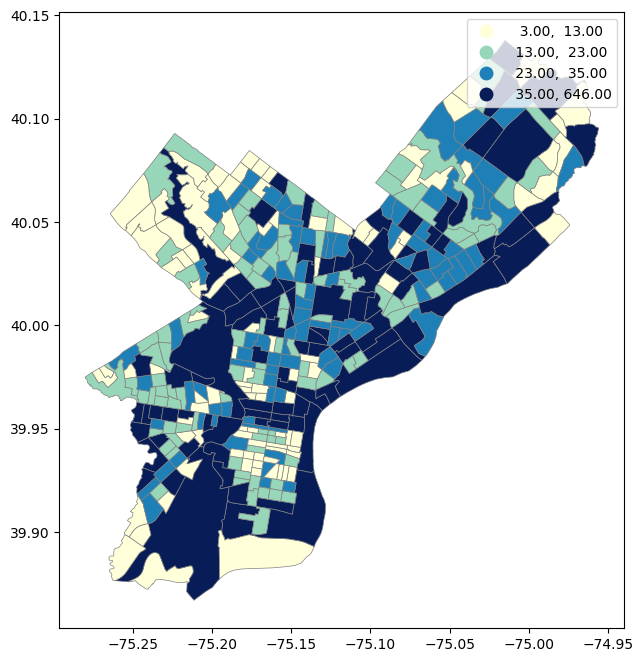

In [42]:
# add crash counts to census tract geographies
trafficAccident_hw = pd.merge(censusMap, results_hw, on="tract")

# create a empty plot for the choropleth map
fig, ax = plt.subplots(1, figsize=(8, 8))

# generate the map
trafficAccident_hw.plot(column='size', 
                         cmap='YlGnBu', 
                         edgecolor='0.5',
                         ax = ax,
                         linewidth=0.5,
                         legend=True,
                         k=4, #the number of classes
                         scheme='quantiles') # 'equal_interval', 'quantiles', 'FisherJenks', 'NaturalBreaks'
